In [1]:
import sys
import matplotlib.pyplot as plt

In [2]:
with open('maze_1.txt', 'w') as outfile:
    outfile.write('0\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x                                 x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxx xxxxx\n')
    outfile.write('x                                 x\n')
    outfile.write('x xxxxxxxxxxxxxxxxxxxxxxxxxxx xxxxx\n')
    outfile.write('x         x                 x     x\n')
    outfile.write('x x xxxxxxxxxxxxx xxxxxxxxx x xxxxx\n')
    outfile.write('x x x   x   x   x x   x   x x      \n')
    outfile.write('x x x x x x x x x x x x x x x xxxxx\n')
    outfile.write('x x x x x x x x x x x x x x x     x\n')
    outfile.write('x x x x x x x x x x x   x   x x x x\n')
    outfile.write('x x x x x x x x x xxxxxxxxxxx x x x\n')
    outfile.write('x x S x   x   x               x x x\n')
    outfile.write('x xxxxxxxxxxxxxxxxxxxxxxxxxxxxx xxx\n')
    outfile.write('x                                 x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
outfile.close()

with open('maze_2.txt', 'w') as outfile:
    outfile.write('0\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x                      \n')
    outfile.write('x xxxxxxxxxxxxxxxxxxx x\n')
    outfile.write('x xxxxxxxxxxxxxxxxxxx x\n')
    outfile.write('x xxxxxxxxxxxxxxxxxxx x\n')
    outfile.write('x xxx     xxx     xxx x\n')
    outfile.write('x xxx xxx xxx xxx xxx x\n')
    outfile.write('x xxx xxx xxx xxx xxx x\n')
    outfile.write('x xxx xxx xxx xxx xxx x\n')
    outfile.write('x xxx xxx xxx xxx xxx x\n')
    outfile.write('x xxx xxx xxx xxx xxx x\n')
    outfile.write('x xxx xxx xxx xxx xxx x\n')
    outfile.write('x xxx xxx xxx xxx xxx x\n')
    outfile.write('x  S  xxx     xxx     x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxx')
outfile.close()

with open('maze_3.txt', 'w') as outfile:
    outfile.write('0\n')
    outfile.write('x xxxxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x x x       x x x   x   x x\n')
    outfile.write('x x x xxxxxxx x x xxx x x x\n')
    outfile.write('x     x x     x   x   x   x\n')
    outfile.write('x xxxxx xxx x x x xxxxxxx x\n')
    outfile.write('x     x     x x x x       x\n')
    outfile.write('x xxx xxx xxx x x xxx x xxx\n')
    outfile.write('x   x x     x S x     x   x\n')
    outfile.write('x x x x xxxxxxx x xxx x x x\n')
    outfile.write('x x x x x       x   x x x x\n')
    outfile.write('xxxxx xxxxxxx xxx xxxxx xxx\n')
    outfile.write('x             x     x     x\n')
    outfile.write('x xxxxxxx xxxxxxxxx xxx xxx\n')
    outfile.write('x   x         x       x   x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
outfile.close()


with open('maze_4.txt', 'w') as outfile:
    outfile.write('0\n')
    outfile.write('xxxxxxxxxxxxx xxxxxxxxxxxxx\n')
    outfile.write('x     x       x     x   x x\n')
    outfile.write('xxx xxxxxxx x x xxxxxxx x x\n')
    outfile.write('x   x       x x x x x     x\n')
    outfile.write('xxx xxx xxx xxx x x x x xxx\n')
    outfile.write('x         x   x   x   x   x\n')
    outfile.write('x xxx xxxxx xxxxx x xxxxx x\n')
    outfile.write('x x x x       x       x   x\n')
    outfile.write('x x xxx x xxx xxxxx x xxx x\n')
    outfile.write('x     x x x     x   x   x x\n')
    outfile.write('x xxxxxxxxx xxx x xxxxxxxxx\n')
    outfile.write('x   x x   x   x x   x     x\n')
    outfile.write('x x x x xxxxx xxx xxx xxxxx\n')
    outfile.write('x x         xS            x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
outfile.close()

with open('maze_5.txt', 'w') as outfile:
    outfile.write('0\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('  x   x         x         x\n')
    outfile.write('x x xxx x xxx x x x xxxxx x\n')
    outfile.write('x x   x x x x x   x x     x\n')
    outfile.write('x xxx x xxx xxx xxx x x xxx\n')
    outfile.write('x x x x     x x x   x x x x\n')
    outfile.write('x x x x xxxxx x x xxx x x x\n')
    outfile.write('x   x   x       x x   x x x\n')
    outfile.write('x x x x xxx x xxx x x xxx x\n')
    outfile.write('x x   x x   x   x x x x   x\n')
    outfile.write('xxxxxxxxx x x x x xSx x xxx\n')
    outfile.write('x x       x x x x x x     x\n')
    outfile.write('x x xxxxx xxx xxx x x xxx x\n')
    outfile.write('x       x   x x     x x   x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
outfile.close()

In [3]:
class Node():
    def __init__(self, state, parent, action, current_cost = 0):
        self.state = state
        self.parent = parent
        self.action = action
        
        self.current_cost = current_cost    # Only A* use this prop

class Frontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

# For DFS
class StackFrontier(Frontier):

    def remove(self):
        if self.empty():
            raise Exception("The frontier is currently empty")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node

# For BFS
class QueueFrontier(Frontier):

    def remove(self):
        if self.empty():
            raise Exception("The frontier is currently empty")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

# For GBFS
class HeuristicManhattanFrontier(Frontier):
    
    def __init__(self, manhattan_matrix):
        super().__init__()
        self.manhattan_matrix = manhattan_matrix
        
    def remove(self):
        if self.empty():
            raise Exception("The frontier is currently empty")
        else:
            node_min_manhattan = self.frontier[0]
            for node in self.frontier:
                if self.manhattan_matrix[node.state[0]][node.state[1]] < self.manhattan_matrix[node_min_manhattan.state[0]][node_min_manhattan.state[1]]:
                    node_min_manhattan = node
            self.frontier.remove(node_min_manhattan)
            return node_min_manhattan

# For A*
class HeuristicManhattanPlusCostFrontier(Frontier):
    
    def __init__(self, manhattan_matrix):
        super().__init__()
        self.manhattan_matrix = manhattan_matrix
        self.manhattan_cost_matrix = manhattan_matrix
        
    def remove(self):
        if self.empty():
            raise Exception("The frontier is currently empty")
        else:
            node_min_manhattan_cost = self.frontier[0]
            h_min = self.manhattan_matrix[node_min_manhattan_cost.state[0]][node_min_manhattan_cost.state[1]] + node_min_manhattan_cost.current_cost
            for node in self.frontier:
                h_manhattan = self.manhattan_matrix[node.state[0]][node.state[1]]
                h_cost = node.current_cost
                h = h_manhattan + h_cost
                if h < h_min:
                    node_min_manhattan_cost = node
                    h_min = h
            # Change value in manhattan_cost_matrix
            self.manhattan_cost_matrix[node_min_manhattan_cost.state[0]][node_min_manhattan_cost.state[1]] = h_min
            # Remove node from frontier
            self.frontier.remove(node_min_manhattan_cost)
            return node_min_manhattan_cost

In [4]:
class Maze():

    def __init__(self, filename):
        self.height = 0
        self.width = 0
        self.walls = []
        self.start = (0,0)
        self.goal = (0,0)
        self.solution = None
        
        self.matrix = []
        self.n_bonus_points = 0
        self.bonus_points = []
        
        self.current_algorithm = ""

        # Read file
        with open(filename,"r") as f:
            self.n_bonus_points = int(next(f)[:-1])
            for i in range(self.n_bonus_points):
                x, y, reward = map(int, next(f)[:-1].split(' '))
                self.bonus_points.append((x, y, reward))
            contents = f.read()
            self.matrix = [list(i) for i in contents.splitlines()]
            f.close()
        
        # print(f"\nn_bonus_points = {self.n_bonus_points}\nbonus_points = {self.bonus_points}\ncontents = {contents}\nmatrix = {self.matrix}")

        # Determine height and width of maze
        contents = contents.splitlines()
        self.height = len(contents)
        self.width = max(len(line) for line in contents)        

        # Walls: a matrix with boolean value (True is wall, False is non-wall)
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:
                    # Starting point
                    if contents[i][j] == "S":
                        self.start = (i, j)
                        row.append(False)
                    # Non-wall
                    elif contents[i][j] == " ":
                        row.append(False)
                        # If the " " is the goal (on the border of matrix)
                        if (i==0) or (i==self.height-1) or (j==0) or (j==self.width-1):
                            self.goal = (i, j)
                            
                            
                            
                            
                            
#                     # Non-wall (bonus point)
#                     elif contents[i][j] == "+":
#                         row.append(False)
                        
                        
                        
                        
                        
                    # Walls
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)

    def print(self):
        solution = self.solution[1] if self.solution is not None else None
        actions = self.solution[0] if self.solution is not None else None

        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    print("█", end="")
                elif (i, j) == self.start:
                    print("S", end="")
                elif (i, j) == self.goal:
                    print("E", end="")
                elif solution is not None and (i, j) in solution:
                    idx_of_cell = solution.index((i, j))
                    action_direction = actions[idx_of_cell]
                    if action_direction == "U":
                        print(f"▴", end="")
                    elif action_direction == "D":
                        print(f"▾", end="")
                    elif action_direction == "R":
                        print(f"▸", end="")
                    elif action_direction == "L":
                        print(f"◂", end="")
                    # print("*", end="")
                else:
                    print(" ", end="")
            print()
        print()


    def next_candidates(self, state):
        row, col = state
        candidates = [
            ("U", (row - 1, col)),
            ("D", (row + 1, col)),
            ("L", (row, col - 1)),
            ("R", (row, col + 1))
        ]

        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        return result
    
    def heuristic_manhattan(self):
        matrix_h = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                if not self.walls[i][j]:
                    manhatan_distance = abs(i - self.goal[0]) + abs(j - self.goal[1])
                    row.append(manhatan_distance)
                else:
                    row.append(-1)
            matrix_h.append(row)
        return matrix_h

    def solve(self, algorithm = "BFS"):
        """Finds a solution to maze, if one exists."""

        self.num_explored = 0
        self.explored = []

        start = Node(state=self.start, parent=None, action=None)
        
        if algorithm == "DFS":
            self.current_algorithm = "DFS"
            self.frontier = StackFrontier()
        elif algorithm == "BFS":
            self.current_algorithm = "BFS"
            self.frontier = QueueFrontier()
        elif algorithm == "GBFS":
            self.current_algorithm = "GBFS"
            manhattan_matrix = self.heuristic_manhattan()
            self.frontier = HeuristicManhattanFrontier(manhattan_matrix)
        elif algorithm == "A*":
            self.current_algorithm = "A*"
            manhattan_matrix = self.heuristic_manhattan()
            self.frontier = HeuristicManhattanPlusCostFrontier(manhattan_matrix)
        
        self.frontier.add(start)

        # Start finding the solution
        while True:
            
            # No solution
            if self.frontier.empty():
                raise Exception("no solution")

            # Consider a node from frontier depends on algorithm
            node = self.frontier.remove()
            self.num_explored += 1

            # Check if goal
            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return
            # If not goal
            else:
                # Append the node to the explored list
                if not node.state in self.explored:
                    self.explored.append(node.state)

                # Add next_candidates to frontier
                for action, state in self.next_candidates(node.state):
                    if not self.frontier.contains_state(state) and state not in self.explored:
                        child = Node(state=state, parent=node, action=action, current_cost = node.current_cost + 1)
                        self.frontier.add(child)
    
    def visualize(self, show_manhattan = False, show_manhattan_plus_cost = False):
        matrix = self.matrix
        bonus = self.bonus_points
        start = self.start
        end = self.goal
        route = self.solution[1] if self.solution is not None else None
        explored = self.explored if self.solution is not None else None

        #1. Define walls and array of direction based on the route
        walls=[(i,j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j]=='x']

        if route:
            direction=[]
            for i in range(1,len(route)):
                if route[i][0]-route[i-1][0]>0:
                    direction.append('v') #^
                elif route[i][0]-route[i-1][0]<0:
                    direction.append('^') #v        
                elif route[i][1]-route[i-1][1]>0:
                    direction.append('>')
                else:
                    direction.append('<')

        #2. Drawing the map
        ax=plt.figure(dpi=200).add_subplot(111)

        for i in ['top','bottom','right','left']:
            ax.spines[i].set_visible(False)

        # Walls
        plt.scatter([i[1] for i in walls],[-i[0] for i in walls], marker='s', s=40, color='black') # 80
        # Bonus
        plt.scatter([i[1] for i in bonus],[-i[0] for i in bonus], marker='P', s=20, color='mediumspringgreen') # 70
        # Start
        plt.scatter(start[1],-start[0], marker='o', s=20, color='tomato') # 70
        # Goal
        plt.scatter(end[1],-end[0], marker='o', s=20, color='dodgerblue') # 70
        if not show_manhattan and not show_manhattan_plus_cost:
            # Route
            if route:
                for i in range(0,len(route)-1):
                    plt.scatter(route[i][1], -route[i][0], marker = direction[i], s=8, color = 'dodgerblue') # 25
            # Explored
            if route and explored:
                for i in range(1,len(explored)):
                    if not explored[i] in route:
                        plt.scatter(explored[i][1], -explored[i][0], marker = ".", s=12, color = 'lightgray') # 50
        
        # Priority: show_manhattan_plus_cost > show_manhattan (Just display one)
        if show_manhattan and show_manhattan_plus_cost:
            show_manhattan = False
        
        font_size = 5 # 7
        
        # Heuristic manhattan
        if show_manhattan:
            manhattan_matrix = self.heuristic_manhattan()
            for i in range(len(manhattan_matrix)):
                for j in range(len(manhattan_matrix[0])):
                    if manhattan_matrix[i][j] != -1 and (i,j) != start and (i,j) != end:
                        if (i,j) in route:
                            plt.text(j,-i,str(manhattan_matrix[i][j]),fontsize=font_size,color='dodgerblue', horizontalalignment='center', verticalalignment='center')
                        elif (i,j) in explored:
                            plt.text(j,-i,str(manhattan_matrix[i][j]),fontsize=font_size,color='dimgray', horizontalalignment='center', verticalalignment='center')
                        else:
                            plt.text(j,-i,str(manhattan_matrix[i][j]),fontsize=font_size,color='lightgray', horizontalalignment='center', verticalalignment='center')
        
        # Heuristic manhattan + cost
        if show_manhattan_plus_cost:
            manhattan_cost_matrix = self.frontier.manhattan_cost_matrix
            for i in range(len(manhattan_cost_matrix)):
                for j in range(len(manhattan_cost_matrix[0])):
                    if manhattan_cost_matrix[i][j] != -1 and (i,j) != start and (i,j) != end:
                        if (i,j) in route:
                            plt.text(j,-i,str(manhattan_cost_matrix[i][j]),fontsize=font_size,color='dodgerblue', horizontalalignment='center', verticalalignment='center')
                        elif (i,j) in explored:
                            plt.text(j,-i,str(manhattan_cost_matrix[i][j]),fontsize=font_size,color='dimgray', horizontalalignment='center', verticalalignment='center')
                        # else:
                        #     plt.text(j,-i,str(manhattan_cost_matrix[i][j]),fontsize=font_size,color='lightgray', horizontalalignment='center', verticalalignment='center')
                
                
        ax.set_xticks([i for i in range(len(matrix[0]))])
        ax.xaxis.set_ticks_position('top')
        ax.set_yticks([-i for i in range(len(matrix))])
        ax.set_yticklabels([i for i in range(len(matrix))])
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        if self.current_algorithm == "DFS":
            title = "DFS - Depth First Search"
        elif self.current_algorithm == "BFS":
            title = "BFS - Breadth First Search"
        elif self.current_algorithm == "GBFS":
            title = "GBFS - Greedy Best First Search"
            if show_manhattan:
                title = "GBFS - Greedy Best First Search (Show Manhattan)"
        elif self.current_algorithm == "A*":
            title = "A*"
            if show_manhattan:
                title = "A* (Show Manhattan)"
            elif show_manhattan_plus_cost:
                title = "A* (Show Manhattan + Cost)"
        else:
            title = "Maze"
        plt.title(title, fontsize = 8, y=-0.1) # 10
        
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

        print(f'Starting point (x, y) = {start[0], start[1]}')
        print(f'Ending point (x, y) = {end[0], end[1]}')

        for _, point in enumerate(bonus):
            print(f'Bonus point at position (x, y) = {point[0], point[1]} with point {point[2]}')
            
        if route:
            print(f"Number of solution nodes: {len(route)}")
            print(f"Number of explored nodes: {len(explored)}")
            
        print()

Height: 16 - Width: 35


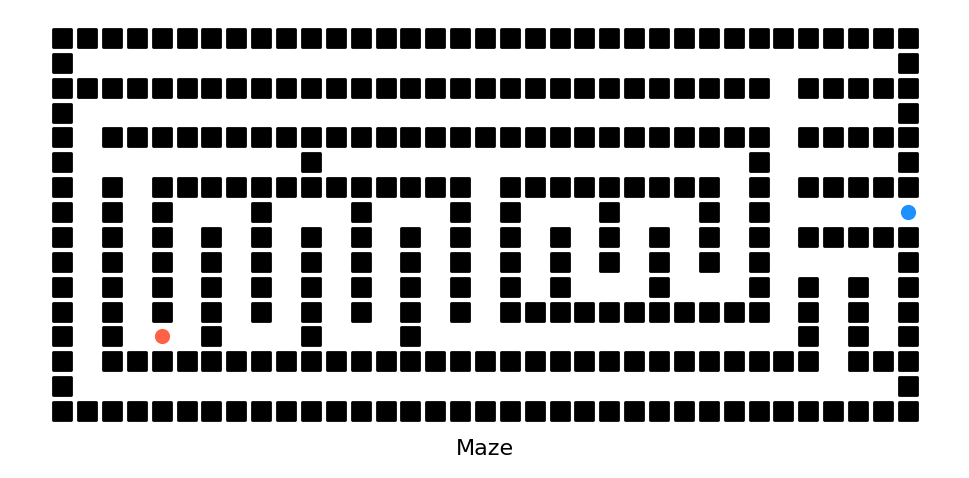

Starting point (x, y) = (12, 4)
Ending point (x, y) = (7, 34)



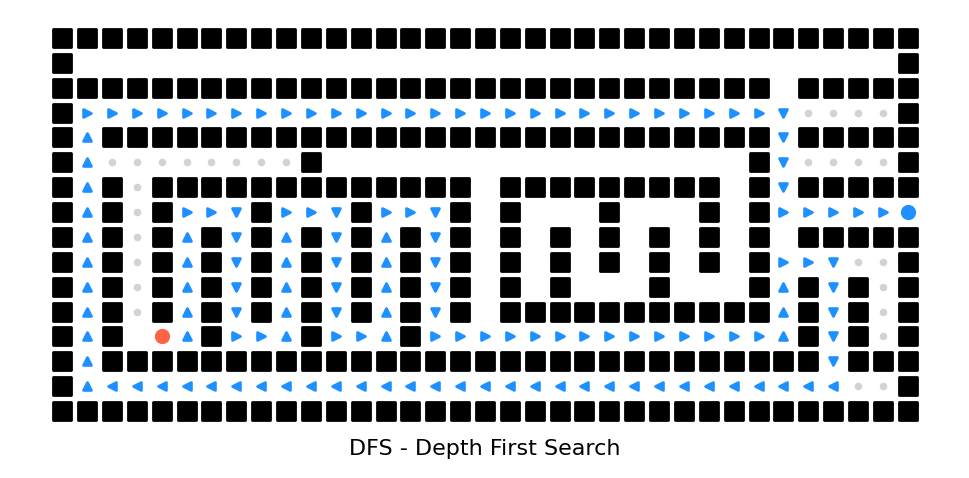

Starting point (x, y) = (12, 4)
Ending point (x, y) = (7, 34)
Number of solution nodes: 143
Number of explored nodes: 172



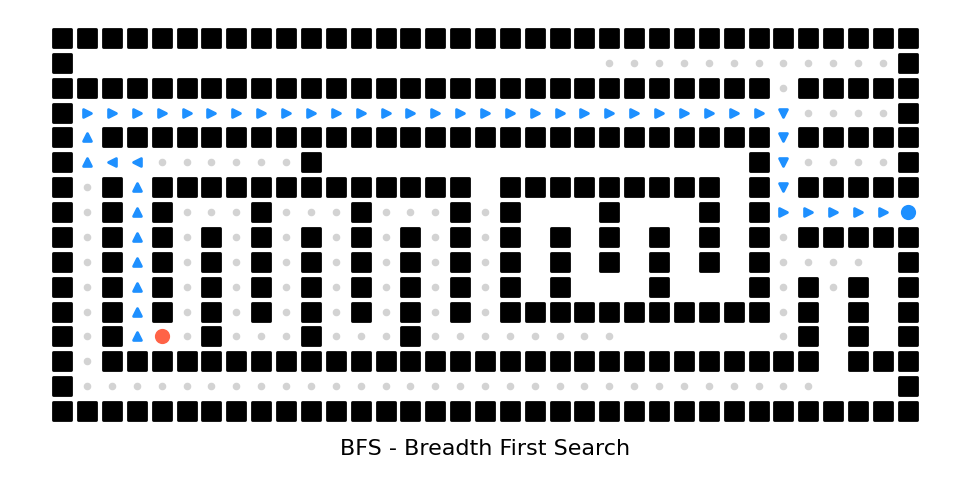

Starting point (x, y) = (12, 4)
Ending point (x, y) = (7, 34)
Number of solution nodes: 49
Number of explored nodes: 176



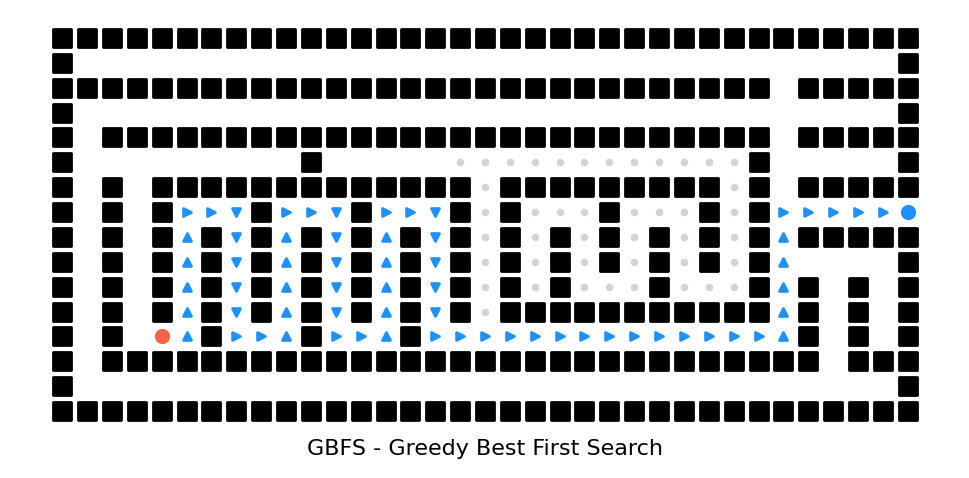

Starting point (x, y) = (12, 4)
Ending point (x, y) = (7, 34)
Number of solution nodes: 65
Number of explored nodes: 108



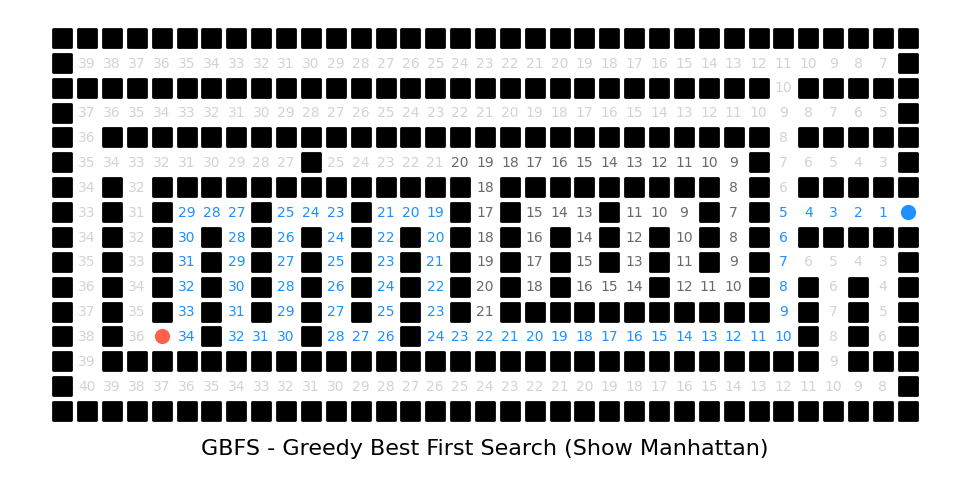

Starting point (x, y) = (12, 4)
Ending point (x, y) = (7, 34)
Number of solution nodes: 65
Number of explored nodes: 108



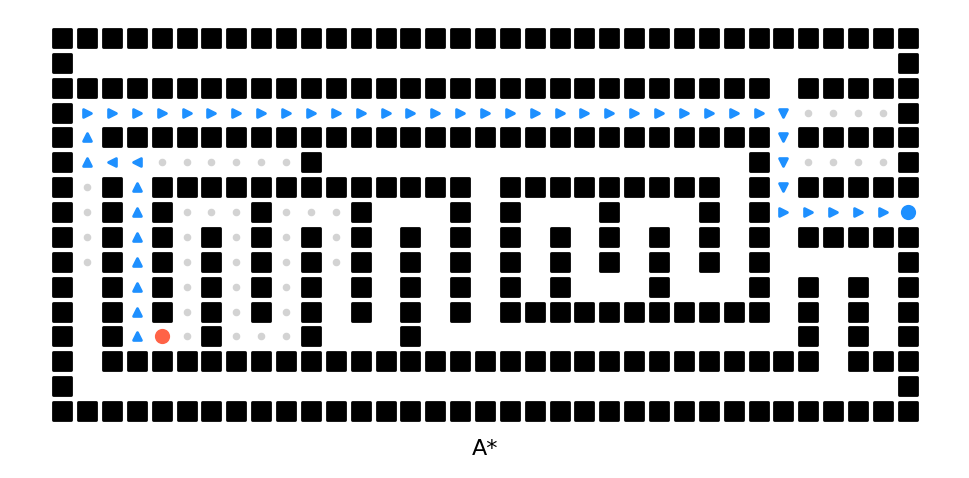

Starting point (x, y) = (12, 4)
Ending point (x, y) = (7, 34)
Number of solution nodes: 49
Number of explored nodes: 91



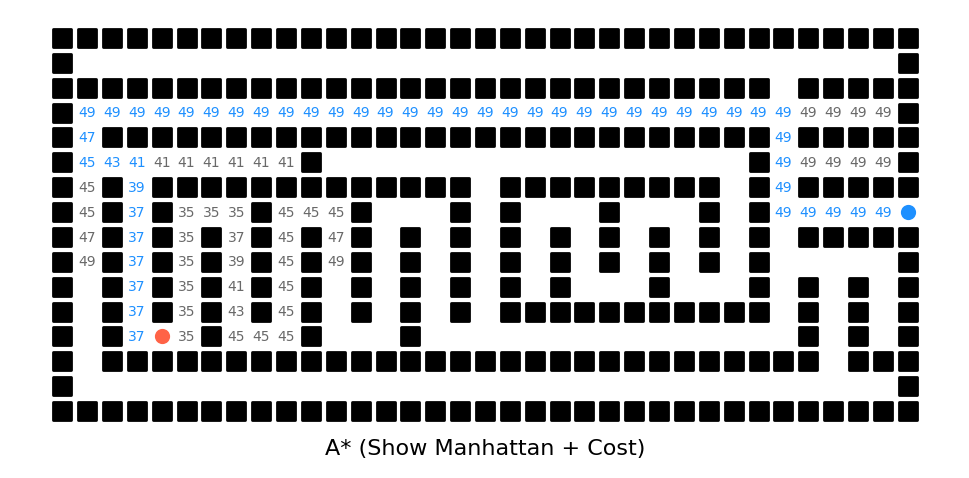

Starting point (x, y) = (12, 4)
Ending point (x, y) = (7, 34)
Number of solution nodes: 49
Number of explored nodes: 91



In [5]:
m = Maze("maze_1.txt")

print(f"Height: {m.height} - Width: {m.width}")
m.visualize()

m.solve(algorithm = "DFS")
# m.print()
m.visualize()

m.solve(algorithm = "BFS")
# m.print()
m.visualize()

m.solve(algorithm = "GBFS")
# m.print()
m.visualize()
m.visualize(show_manhattan = True)

m.solve(algorithm = "A*")
# m.print()
m.visualize()
m.visualize(show_manhattan_plus_cost = True)